In [1]:
import numpy as np

import pandas as pd

from pyntcloud import PyntCloud
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class convertor():
    def __init__(self):
        self.cx = 1#620.5
        self.cy = 1#187.0
        self.fx = 1#725
        self.fy = 1#725
        
    def point_cloud(self, depth):
        """Transform a depth image into a point cloud with one point for each
        pixel in the image, using the camera transform for a camera
        centred at cx, cy with field of view fx, fy.

        depth is a 2-D ndarray with shape (rows, cols) containing
        depths from 1 to 254 inclusive. The result is a 3-D array with
        shape (rows, cols, 3). Pixels with invalid depth in the input have
        NaN for the z-coordinate in the result.

        """
        rows, cols = depth.shape
        c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
        valid = (depth > 0) & (depth < 255)
        z = np.where(valid, depth / 256.0, np.nan)
        x = np.where(valid, z * (c - self.cx) / self.fx, 0)
        y = np.where(valid, z * (r - self.cy) / self.fy, 0)
        return np.dstack((x, y, z))

In [3]:
conv = convertor()

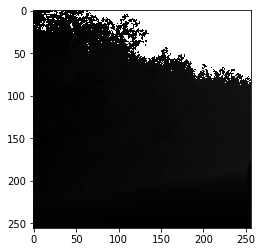

In [4]:
filename = 'github/pytorch-CycleGAN-and-pix2pix/datasets/rgb2depth2/trainB/0.png'
img = cv2.imread(filename , cv2.IMREAD_GRAYSCALE)
plt.imshow(img,'gray')

In [5]:
points = conv.point_cloud(img)
points = points.reshape(-1,3)
points.shape
# points = points[:300]

(65536, 3)

In [6]:

points = pd.DataFrame(points,columns=['x','y','z'])

cloud = PyntCloud(points)


In [7]:
cloud.plot()

In [51]:
cloud.to_file('2.XYZ')

In [1]:
import rospy

ModuleNotFoundError: No module named 'rospy'